1. Task: Develop a classification model for titanic survival prediction.
    1. EDA (Univariate, Multivariate, KDE, Pearson Correlation)
2. Download the data from https://www.kaggle.com/c/titanic/data and perform the following operations.
3.  Data Preprocessing (Imputation, create at least 2 new features)
4.  Cross-validation
5.  Use ROC curve, Precision/Recall for the model's metric (NOT ALLOWED TO USE ACCURACY)
6.  An inference pipeline consisting of Data Preprocessing and prediction.
7. Note: It is mandatory to plot each graph and write an observation about it. Plot without title, x-label and y-label won't be accepted.

### **Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the train data
train_data = pd.read_csv('train.csv', encoding_errors='ignore')
print("The shape of training data is: ", train_data.shape)

The shape of training data is:  (891, 12)


In [3]:
# Reading the test data
test_data = pd.read_csv('test.csv', encoding_errors='ignore')
print("The shape of testing data is: ", test_data.shape)

The shape of testing data is:  (418, 11)


In [4]:
# Lets see the columns in train dataset.
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Lets see the columns in train dataset.
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
# Checking data information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## **Exploratory Data Analysis(EDA)**

### **Univariate Analysis**

In [9]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

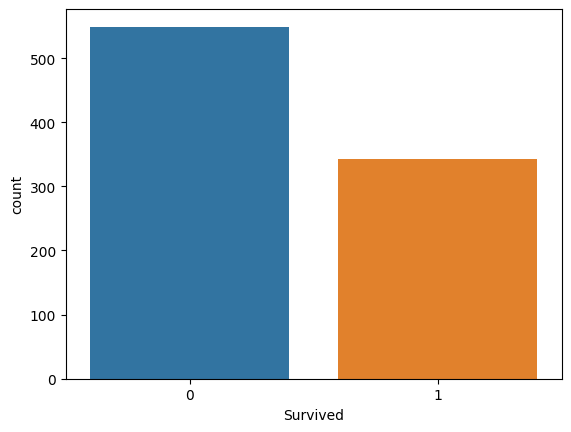

In [10]:
sns.countplot(data=train_data, x = 'Survived')
plt.show()

In [11]:
train_data.groupby(by=['Survived'])['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

**Observations:-**

* 549 Passengers on the ship did not survived in the incident.
* 342 passengers on the ship surivived int the incident.

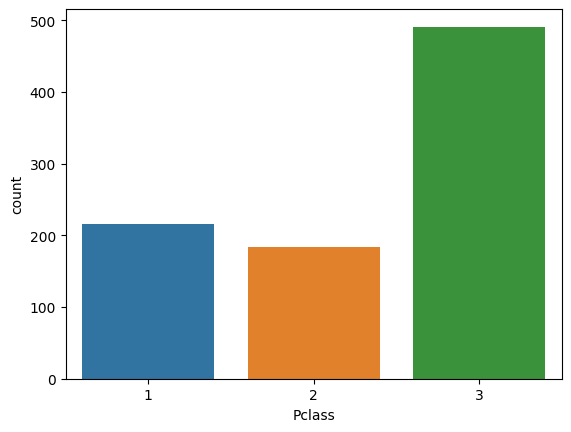

In [12]:
sns.countplot(data=train_data, x = 'Pclass')
plt.show()

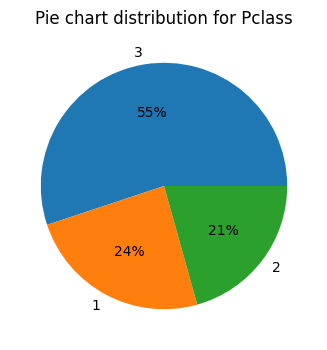

In [13]:
sizes = train_data["Pclass"].value_counts().values
labels = train_data["Pclass"].value_counts().index
plt.figure(figsize = [8,4])
plt.pie(sizes,
        labels=labels,
        autopct='%1.0f%%')
plt.grid()
plt.title("Pie chart distribution for Pclass")
plt.show()

In [14]:
train_data.groupby(by=['Pclass'])['Pclass'].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

**Observations:-**

* There were 216 passengers in 1st class, 184 in 2nd class and 491 in 3rd class.
* Majority of passengers belonged in 3rd passenger class.

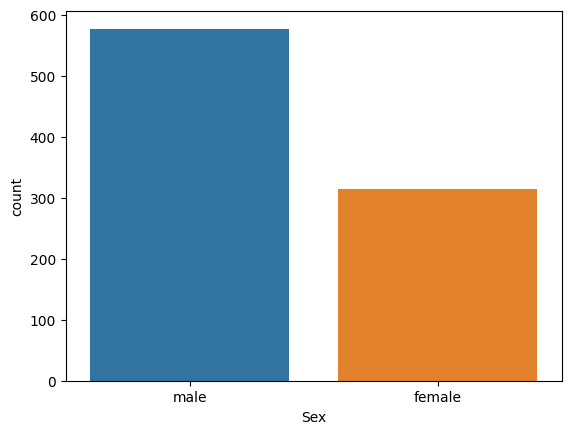

In [15]:
sns.countplot(data=train_data, x = 'Sex')
plt.show()

In [16]:
train_data.groupby(by=['Sex'])['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

**Observations:-**

* There were 577 males and 314 females on the ship.

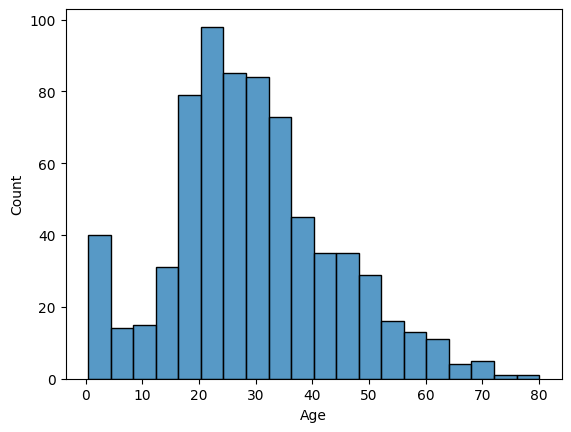

In [17]:
sns.histplot(data=train_data, x = 'Age')
plt.show()

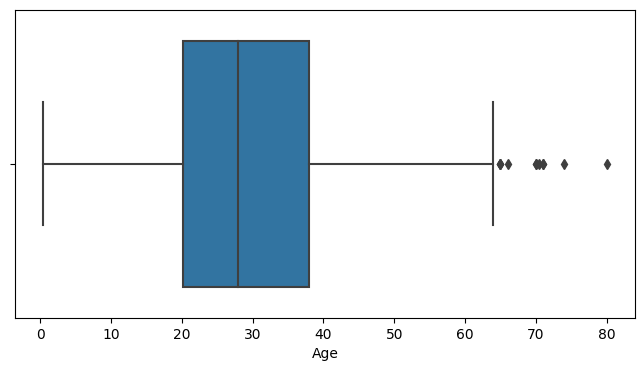

In [18]:
plt.figure(figsize= [8,4])
sns.boxplot(x='Age', data = train_data, orient = 'h')
plt.show()

**Observations:-**

* There are some outliers in Age column of data.
* Most passengers belong in between age of 20 to 35.

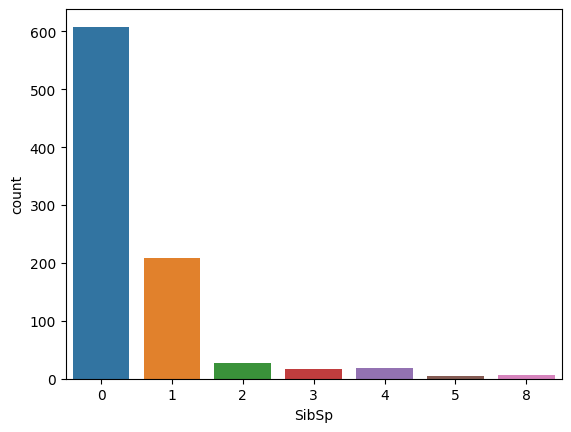

In [19]:
sns.countplot(data = train_data, x = 'SibSp')
plt.show()

In [20]:
train_data.groupby(by=['SibSp'])['SibSp'].count()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

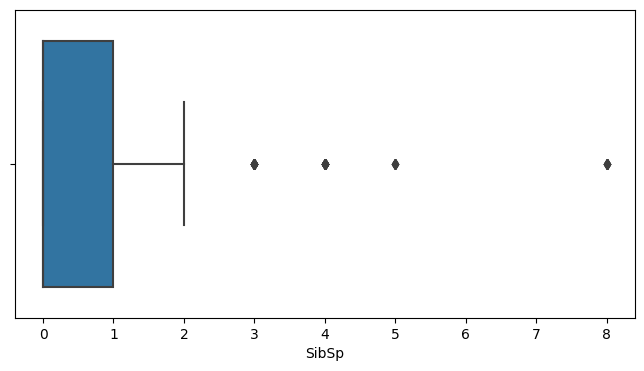

In [21]:
plt.figure(figsize= [8,4])
sns.boxplot(x='SibSp', data = train_data, orient = 'h')
plt.show()

**Observations:-**
* More than 600 passengers were travelling alone with no family with them.
* There are some outliers in the data.

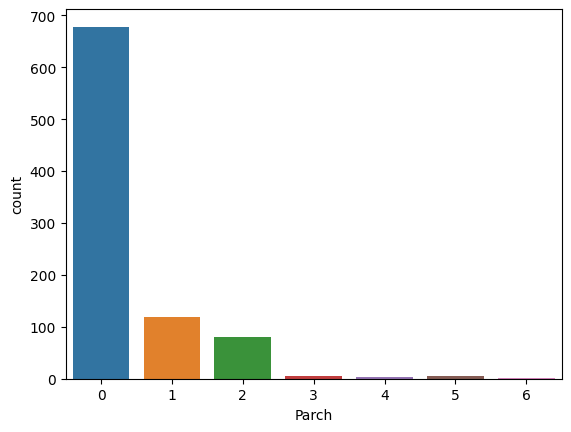

In [22]:
sns.countplot(data = train_data, x = 'Parch')
plt.show()

In [23]:
train_data.groupby(by=['Parch'])['Parch'].count()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

**Observation**

* More than 600 passengers were travelling alone on ship with no parents or childrens along with them.

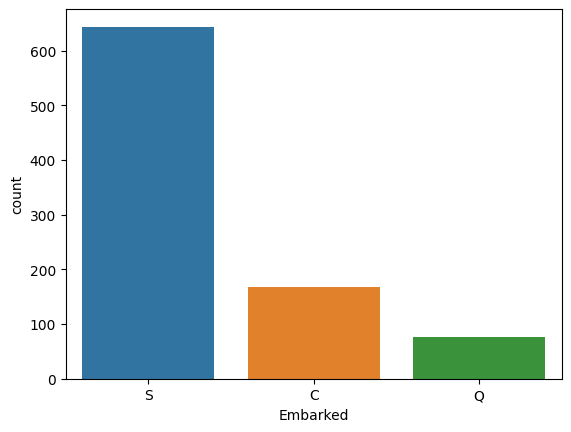

In [24]:
sns.countplot(data = train_data, x = 'Embarked')
plt.show()

In [25]:
train_data.groupby(by=['Embarked'])['Embarked'].count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

**Observation**

* Majority of passengers had their embarkation from Southampton port.

### **Bi-Variate Analysis**

**What is survival count as per Passenger Class**

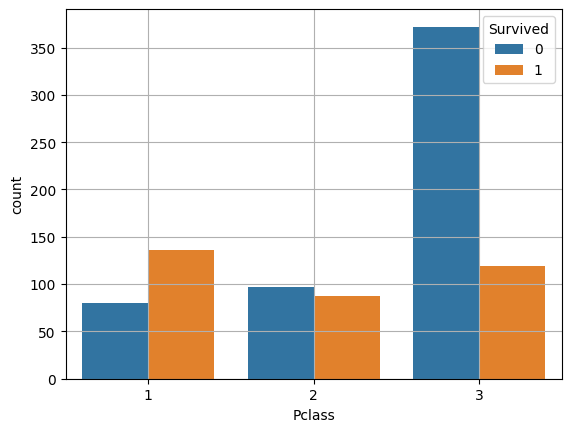

In [26]:
sns.countplot(data=train_data, x='Pclass',hue='Survived')
plt.grid()
plt.show();

In [27]:
train_data.groupby(by=['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

**Observations:-**

* From 1st passenger class 136 passengers survived and 80 did not.
* From 2nd passenger class only 87 passengers survived and 97 did not.
* From 3rd passenger class only 119 passengers survived and 372 did not.

**What is survival count gender wise.**

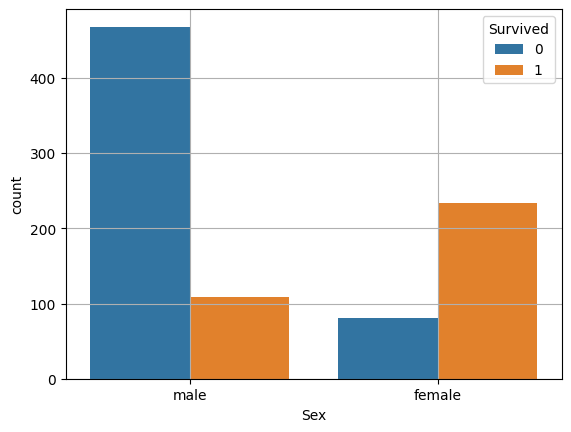

In [28]:
sns.countplot(data=train_data, x='Sex',hue='Survived')
plt.grid()
plt.show();

In [29]:
train_data.groupby(by=['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

**Observations:-**

* From the data 233 females and 109 males survived the incident of Titanic ship.
* 81 females and 468 males were not able to survive in the incident.

**From which Embarkment point most passengers survived?**

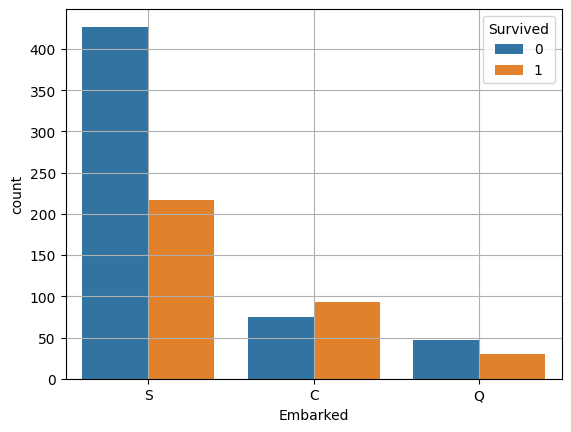

In [30]:
sns.countplot(data=train_data, x='Embarked',hue='Survived')
plt.grid()
plt.show();

In [31]:
train_data.groupby(by=['Embarked','Survived'])['Survived'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

**Observations:-**

* Passengers from Southampton port had more deaths and more survival compared to other two ports.

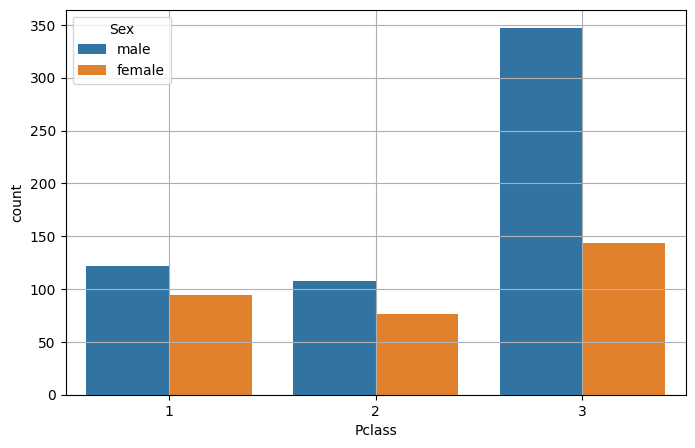

In [32]:
plt.figure(figsize=[8,5])
sns.countplot(data=train_data, x='Pclass',hue='Sex')
plt.grid()
plt.show();

## **KDE Plots**

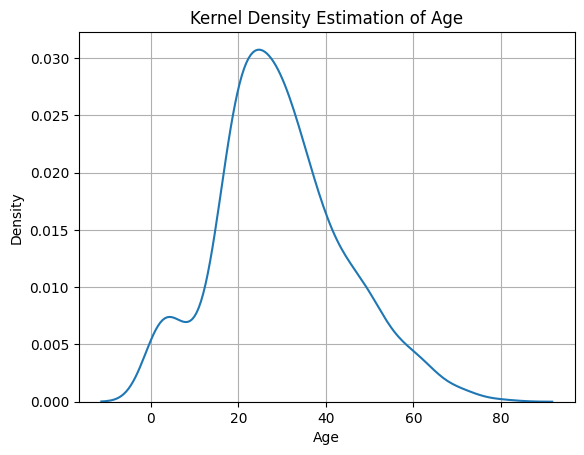

In [33]:
sns.kdeplot(data=train_data, x = 'Age')
plt.title('Kernel Density Estimation of Age')
plt.grid()
plt.show()

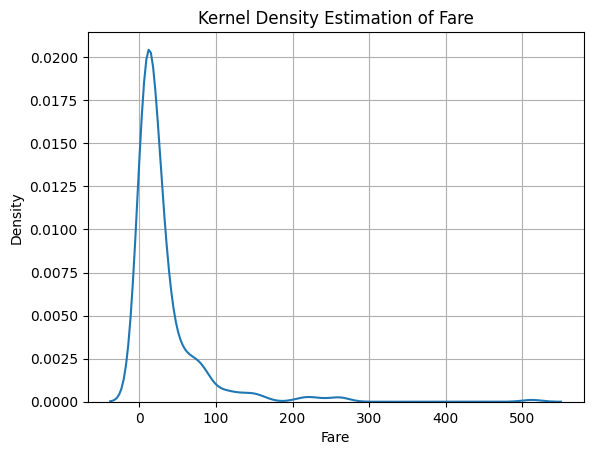

In [34]:
sns.kdeplot(data=train_data, x='Fare')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Fare')
plt.grid()
plt.show()

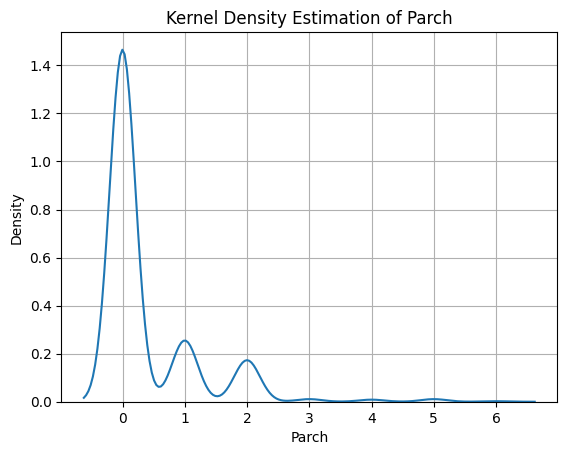

In [35]:
sns.kdeplot(data=train_data, x='Parch')
plt.xlabel('Parch')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Parch')
plt.grid()
plt.show()

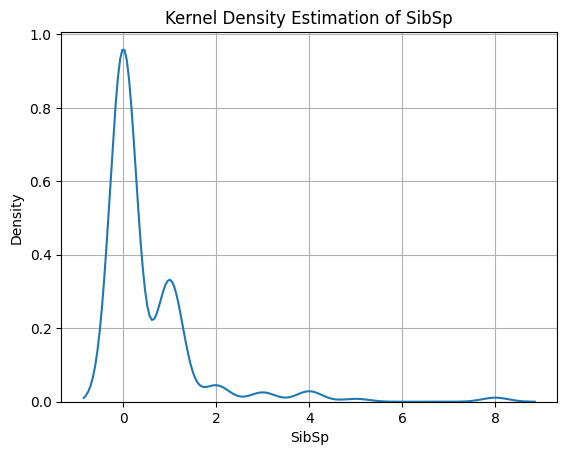

In [36]:
sns.kdeplot(data=train_data, x='SibSp')
plt.xlabel('SibSp')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of SibSp')
plt.grid()
plt.show()

In [37]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## **Pearson Correlation**

In [38]:
correlation = train_data.corr(method='pearson')

<ipython-input-38-ce194fb74523>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train_data.corr(method='pearson')


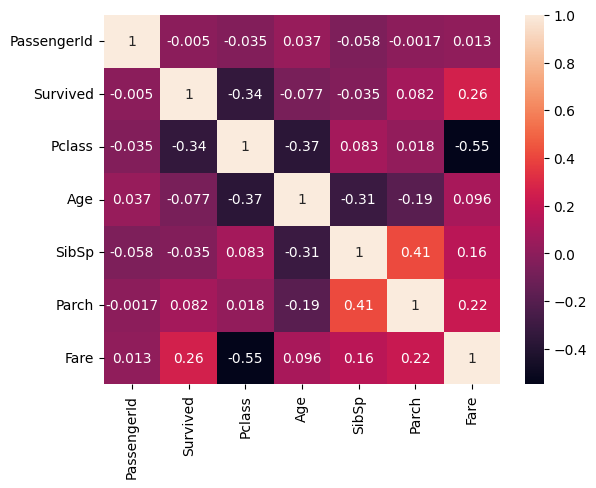

In [39]:
sns.heatmap(correlation, annot=True)
plt.show()

## **Data Cleaning**

In [40]:
# Checking the null count or missing value count in our data.

train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Observations:-**

- We have missing values in columns 'Age', 'Cabin', 'Embarked' of train data

In [41]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [43]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [44]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Observations:-**

- We have null values in columns 'Age', 'Fare', 'Cabin' in test data.

In [45]:
# missing_value_percent
train_data_copy = train_data.copy()

def missing_value_percent(df):

    missing_val = df.isna().sum()

    missing_val_per = (missing_val/len(df))*100

    missing_val_table = pd.concat([missing_val,missing_val_per],axis=1)

    missing_val_table = missing_val_table.rename(
                        columns = {0:'Missing Values',1:'Percentage of values missing'})

    return missing_val_table

missing_value_percent(train_data_copy)

,Missing Values,Percentage of values missing
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


**Observations:**
- Cabin: 77% missing values
- Age: 19% missing values
- Emabrked has only two missing values.

In [46]:
train_data_copy = train_data_copy.drop("Cabin", axis=1)

In [47]:
mean_age = round(np.mean(train_data_copy['Age']),0)

In [48]:
mean_age

30.0

In [49]:
train_data_copy['Age'] = train_data_copy['Age'].fillna(mean_age)

In [50]:
train_data_copy['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [51]:
train_data_copy = train_data_copy.dropna()

In [52]:
train_data_copy.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

In [53]:
train_data_copy.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.713352,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.969135,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
test_data_copy = test_data.copy()
missing_value_percent(test_data_copy)

,Missing Values,Percentage of values missing
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,86,20.574163
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.239234
Cabin,327,78.229665


**Observations:**
- Cabin: 78% missing values
- Age: 20% missing values
- Fare has only one missing value.

In [55]:
test_data_copy = test_data_copy.drop('Cabin', axis=1)

In [56]:
mean_age = round(np.mean(test_data_copy['Age']),0)

In [57]:
mean_age

30.0

In [58]:
test_data_copy['Age'] = test_data_copy["Age"].fillna(mean_age)

In [59]:
test_data_copy['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    30.0
414    39.0
415    38.5
416    30.0
417    30.0
Name: Age, Length: 418, dtype: float64

In [60]:
test_data_copy = test_data_copy.dropna()

In [61]:
test_data_copy.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

### **Label Encoding**

In [62]:
train_data_copy['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [63]:
train_data_copy['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [64]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

train_data_copy['Sex'] = encoder.fit_transform(train_data_copy['Sex'])
train_data_copy['Embarked'] = encoder.fit_transform(train_data_copy['Embarked'])
test_data_copy['Sex'] = encoder.fit_transform(test_data_copy['Sex'])
test_data_copy['Embarked'] = encoder.fit_transform(test_data_copy['Embarked'])


In [65]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* We can drop columns ['PassengerId', 'Name', 'Ticket'] as they wont affect the prediction results.

In [66]:
train_data_copy = train_data_copy.drop(['PassengerId', 'Name', 'Ticket'],axis=1)
test_data_copy = test_data_copy.drop(['Name', 'Ticket'],axis=1)

In [67]:
train_data_copy.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

## **Feature Engineering**

In [68]:
def new_age_group(data):
  age_group = []
  for age in data["Age"]:
      if age < 2:
          age_group.append('Infants')
      elif age >= 2 and age <= 12:
          age_group.append('Children')
      elif age > 12 and age <= 19:
          age_group.append('Teenagers')
      elif age > 20 and age <= 39:
          age_group.append('Young Adults')
      elif age > 40 and age <= 59:
          age_group.append('Middle Aged')
      else:
          age_group.append('Senior Citizens')
  data['Age_group'] = age_group

In [69]:
new_age_group(train_data_copy)
# train_data['Age_group'] = age_group

In [70]:
new_age_group(test_data_copy)
# test_data['Age_group'] = age_group

In [71]:
# Creating the 'Alone or Not' column in train data
train_data_copy['Alone or Not'] = train_data_copy['SibSp'] + train_data_copy['Parch']
train_data_copy['Alone or Not'] = train_data_copy['Alone or Not'].apply(lambda x: 1 if x > 0 else 0)

# Creating the 'Alone or Not' column in test data
test_data_copy['Alone or Not'] = test_data_copy['SibSp'] + test_data_copy['Parch']
test_data_copy['Alone or Not'] = test_data_copy['Alone or Not'].apply(lambda x: 1 if x > 0 else 0)

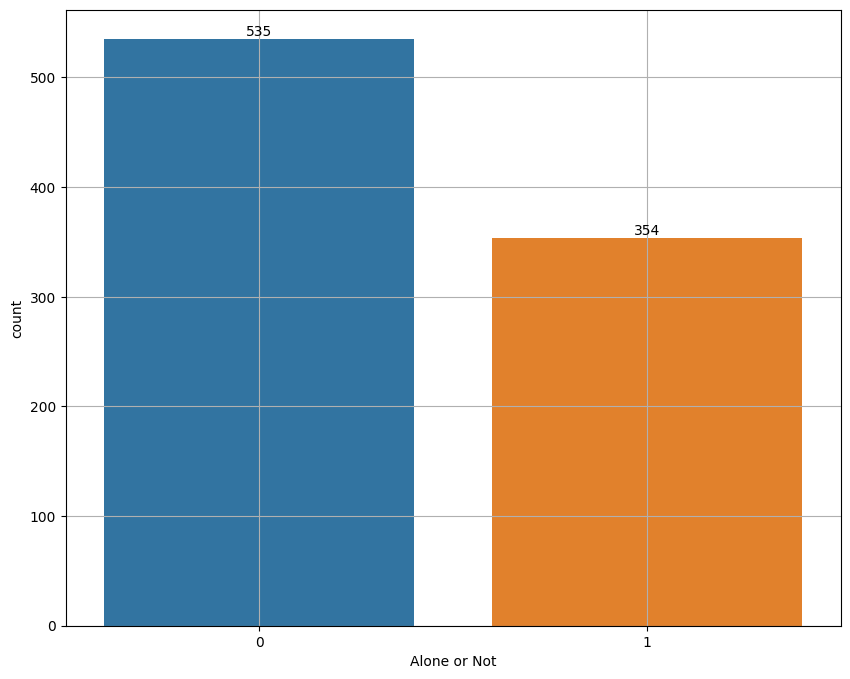

In [72]:
plt.figure(figsize=[10,8])
sns.countplot(data=train_data_copy, x='Alone or Not')

value_counts = train_data_copy['Alone or Not'].value_counts()

for i, count in enumerate(value_counts):
    plt.annotate(count, (i, count), ha='center', va='bottom')
plt.grid();
plt.show();

**Observations:-**

* We can observe that around 535 passengers were travelling alone on the ship and 354 passengers were with their family.

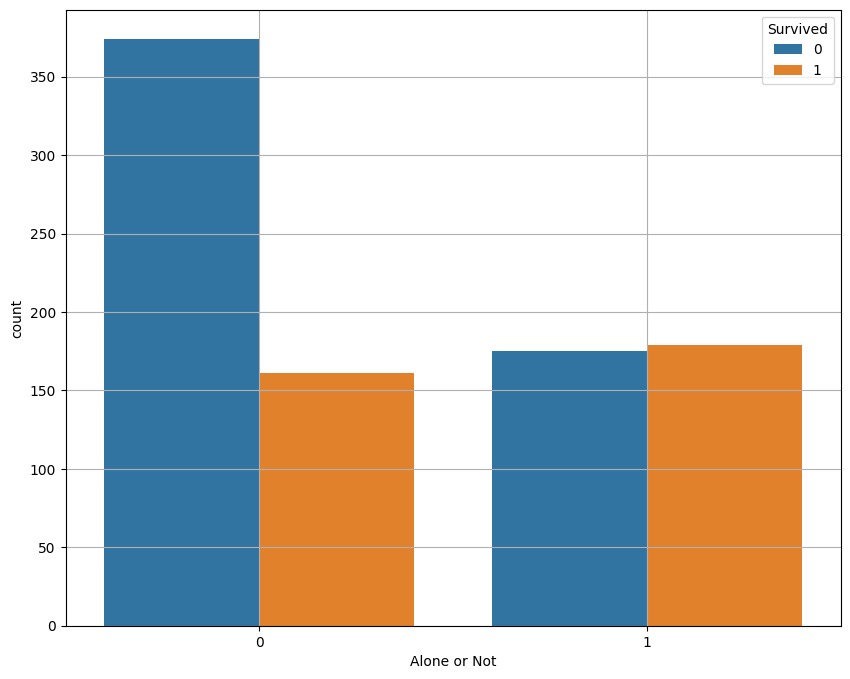

In [73]:
plt.figure(figsize=[10,8])
sns.countplot(data=train_data_copy, x='Alone or Not', hue='Survived')
plt.grid();
plt.show();

In [74]:
train_data_copy.groupby(by=['Alone or Not', 'Survived'])['Survived'].count()

Alone or Not  Survived
0             0           374
              1           161
1             0           175
              1           179
Name: Survived, dtype: int64

**Observations**


*   We can see more than 500 passengers were travelling alone on Titanic Ship in which 161 passengers survived and 374 passengers did not survived.
*   We can see more than 350 passengers were travelling with their family on Titanic Ship in which 179 passengers survived and 175 did not survived.



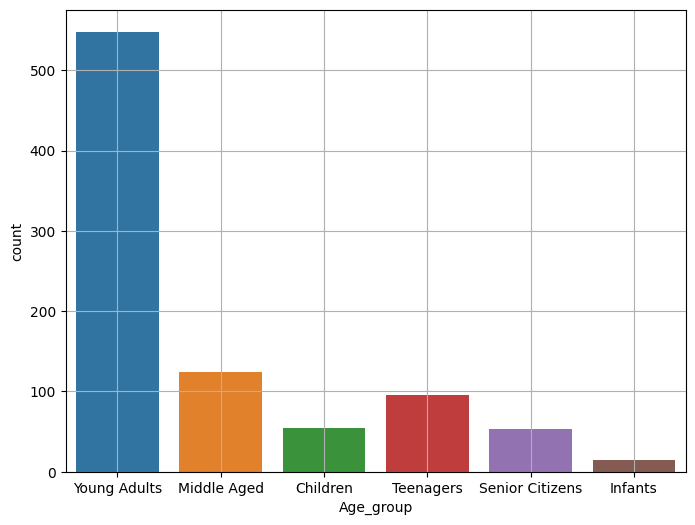

In [75]:
plt.figure(figsize=[8,6])
sns.countplot(data=train_data_copy, x='Age_group')
plt.grid();
plt.show();

In [76]:
train_data_copy['Age_group'].value_counts()

Young Adults       548
Middle Aged        124
Teenagers           95
Children            55
Senior Citizens     53
Infants             14
Name: Age_group, dtype: int64

In [77]:
train_data_copy.groupby(by=['Age_group', 'Survived'])['Survived'].count()

Age_group        Survived
Children         0            27
                 1            28
Infants          0             2
                 1            12
Middle Aged      0            76
                 1            48
Senior Citizens  0            38
                 1            15
Teenagers        0            56
                 1            39
Young Adults     0           350
                 1           198
Name: Survived, dtype: int64

**Observations:-**

* We can observe more deaths amoung young adults, Middle Aged, Senior Citizens, and Teenagers.

In [78]:
train_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      889 non-null    int64  
 1   Pclass        889 non-null    int64  
 2   Sex           889 non-null    int64  
 3   Age           889 non-null    float64
 4   SibSp         889 non-null    int64  
 5   Parch         889 non-null    int64  
 6   Fare          889 non-null    float64
 7   Embarked      889 non-null    int64  
 8   Age_group     889 non-null    object 
 9   Alone or Not  889 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 76.4+ KB


In [79]:
# Label encoding for Age group
train_data_copy['Age_group'] = encoder.fit_transform(train_data_copy['Age_group'])
test_data_copy['Age_group'] = encoder.fit_transform(test_data_copy['Age_group'])

## **Cross Validation**

### **Train Test spilt**

In [80]:
from sklearn.model_selection import train_test_split

X = train_data_copy.drop('Survived', axis=1)
y = train_data_copy['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [81]:
# Shapes of the data
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((711, 9), (178, 9), (711,), (178,))

## **Logistic Regression Model**

In [82]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Precision Score: 0.7619047619047619
Recall Score: 0.7058823529411765


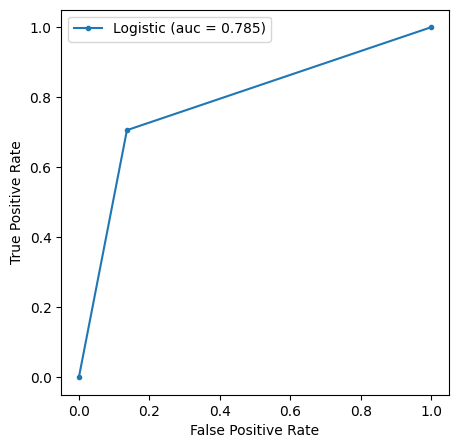

In [83]:
from sklearn.metrics import precision_score, recall_score, roc_curve, auc

# Make predictions on the validation set
y_pred_log_reg = log_reg.predict(X_val)

# Calculate the metrics
log_reg_precision = precision_score(y_val, y_pred_log_reg)
log_reg_recall = recall_score(y_val, y_pred_log_reg)
log_reg_fpr, log_reg_tpr, threshold = roc_curve(y_val, y_pred_log_reg)
log_reg_auc = auc(log_reg_fpr, log_reg_tpr)

# Print the metrics
print(f'Precision Score: {log_reg_precision}')
print(f'Recall Score: {log_reg_recall}')

# ROC Curve Plot
plt.figure(figsize=[5,5])
plt.plot(log_reg_fpr, log_reg_tpr, marker='.', label='Logistic (auc = %0.3f)' % log_reg_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## **K-Nearest Neighbor Model**

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6, metric='euclidean')

In [85]:
# KNN Model training
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

Precision Score: 0.775
Recall Score: 0.45588235294117646


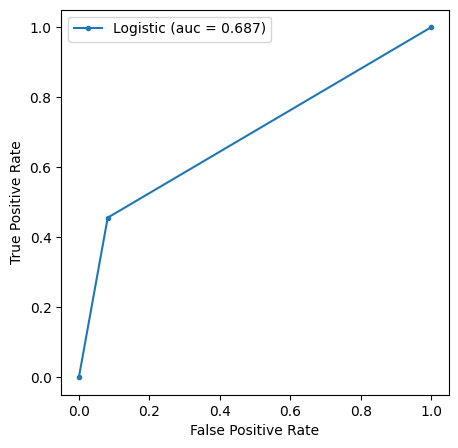

In [86]:
# Make predictions on the validation set
y_pred_knn = knn.predict(X_val)

# Calculate the metrics
knn_precision = precision_score(y_val, y_pred_knn)
knn_recall = recall_score(y_val, y_pred_knn)
knn_fpr, knn_tpr, threshold = roc_curve(y_val, y_pred_knn)
knn_auc = auc(knn_fpr, knn_tpr)

# Print the metrics
print(f'Precision Score: {knn_precision}')
print(f'Recall Score: {knn_recall}')

# ROC Curve Plot
plt.figure(figsize=[5,5])
plt.plot(knn_fpr, knn_tpr, marker='.', label='Logistic (auc = %0.3f)' % knn_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## **Decision Trees**

In [87]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

# Training the decision tree model
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

Precision Score: 0.7575757575757576
Recall Score: 0.7352941176470589


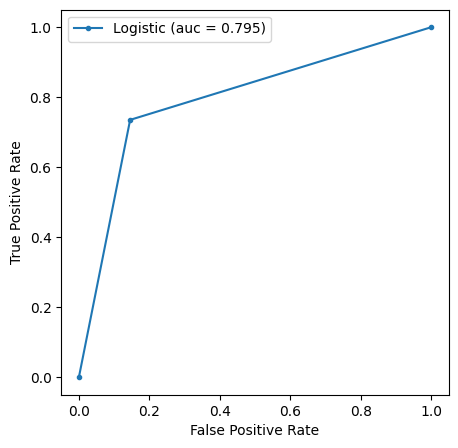

In [88]:
# Make predictions on the validation set
y_pred_decision_tree = decision_tree.predict(X_val)

# Calculate the metrics
decision_tree_precision = precision_score(y_val, y_pred_decision_tree)
decision_tree_recall = recall_score(y_val, y_pred_decision_tree)
decision_tree_fpr, decision_tree_tpr, threshold = roc_curve(y_val, y_pred_decision_tree)
decision_tree_auc = auc(decision_tree_fpr, decision_tree_tpr)

# Print the metrics
print(f'Precision Score: {decision_tree_precision}')
print(f'Recall Score: {decision_tree_recall}')

# ROC Curve Plot
plt.figure(figsize=[5,5])
plt.plot(decision_tree_fpr, decision_tree_tpr, marker='.', label='Logistic (auc = %0.3f)' % decision_tree_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## **Support Vector Machine**

In [89]:
from sklearn.svm import SVC

svm = SVC()

# Train the SVM model
svm.fit(X_train, y_train)

SVC()

Precision Score: 0.9090909090909091
Recall Score: 0.29411764705882354


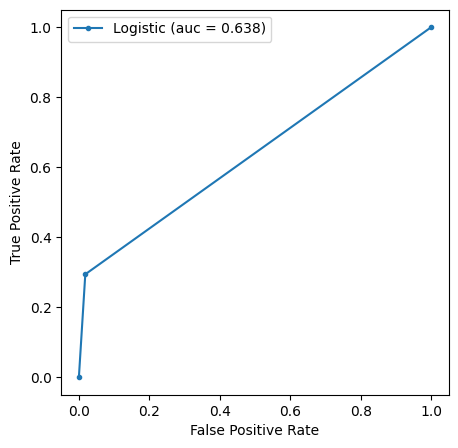

In [90]:
# Make predictions on the validation set
y_pred_svm = svm.predict(X_val)

# Calculate the metrics
svm_precision = precision_score(y_val, y_pred_svm)
svm_recall = recall_score(y_val, y_pred_svm)
svm_fpr, svm_tpr, threshold = roc_curve(y_val, y_pred_svm)
svm_auc = auc(svm_fpr, svm_tpr)

# Print the metrics
print(f'Precision Score: {svm_precision}')
print(f'Recall Score: {svm_recall}')

# ROC Curve Plot
plt.figure(figsize=[5,5])
plt.plot(svm_fpr, svm_tpr, marker='.', label='Logistic (auc = %0.3f)' % svm_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## **Naive Bayes**

In [91]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()

# Train the Naive Bayes model
naive_bayes.fit(X_train, y_train)

GaussianNB()

Precision Score: 0.7313432835820896
Recall Score: 0.7205882352941176


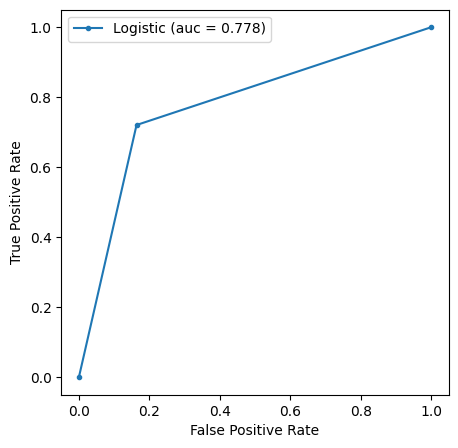

In [92]:
y_pred_naive_bayes = naive_bayes.predict(X_val)

# Calculate the metrics
naive_bayes_precision = precision_score(y_val, y_pred_naive_bayes)
naive_bayes_recall = recall_score(y_val, y_pred_naive_bayes)
naive_bayes_fpr, naive_bayes_tpr, threshold = roc_curve(y_val, y_pred_naive_bayes)
naive_bayes_auc = auc(naive_bayes_fpr, naive_bayes_tpr)

# Print the metrics
print(f'Precision Score: {naive_bayes_precision}')
print(f'Recall Score: {naive_bayes_recall}')

# ROC Curve Plot
plt.figure(figsize=[5,5])
plt.plot(naive_bayes_fpr, naive_bayes_tpr, marker='.', label='Logistic (auc = %0.3f)' % naive_bayes_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### **K-Fold Cross Validation for Logistic Regression**

In [93]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation (e.g., k=5)
k = 5
scores = cross_val_score(log_reg, X, y, cv=k, scoring='accuracy')

log_reg_mean_acc_scores = scores.mean()

# Print the cross-validation scores
print(f'Cross-Validation Scores: {scores}')
print(f'Mean Accuracy: {scores.mean()}')
print(f'Standard Deviation: {scores.std()}')


Cross-Validation Scores: [0.76404494 0.80898876 0.79775281 0.79775281 0.83050847]
Mean Accuracy: 0.7998095600837936
Standard Deviation: 0.021513946002493334


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

### **K-Fold Cross Validation for KNN Classifier**

In [94]:
# Perform k-fold cross-validation (e.g., k=5)
k = 5
scores = cross_val_score(knn, X, y, cv=k, scoring='accuracy')

knn_mean_acc_scores = scores.mean()

# Print the cross-validation scores
print(f'Cross-Validation Scores: {scores}')
print(f'Mean Accuracy: {scores.mean()}')
print(f'Standard Deviation: {scores.std()}')

Cross-Validation Scores: [0.61235955 0.66292135 0.70786517 0.69662921 0.68361582]
Mean Accuracy: 0.6726782200215832
Standard Deviation: 0.0336598899008205


### **K-Fold Cross Validation for Decision Tree Classifier**

In [95]:
# Perform k-fold cross-validation (e.g., k=5)
k = 5
scores = cross_val_score(decision_tree, X, y, cv=k, scoring='accuracy')

decision_tree_mean_acc_scores = scores.mean()

# Print the cross-validation scores
print(f'Cross-Validation Scores: {scores}')
print(f'Mean Accuracy: {scores.mean()}')
print(f'Standard Deviation: {scores.std()}')

Cross-Validation Scores: [0.7247191  0.7752809  0.79775281 0.75842697 0.8079096 ]
Mean Accuracy: 0.7728178759601345
Standard Deviation: 0.029596747125926973


### **K-Fold Cross Validation for Support Vector Machine**

In [96]:
# Perform k-fold cross-validation (e.g., k=5)
k = 5
scores = cross_val_score(svm, X, y, cv=k, scoring='accuracy')

svm_mean_acc_scores = scores.mean()

# Print the cross-validation scores
print(f'Cross-Validation Scores: {scores}')
print(f'Mean Accuracy: {scores.mean()}')
print(f'Standard Deviation: {scores.std()}')

Cross-Validation Scores: [0.59550562 0.71348315 0.68539326 0.68539326 0.68926554]
Mean Accuracy: 0.6738081635244081
Standard Deviation: 0.04052839032805854


### **K-Fold Cross Validation for Naive Bayes**

In [97]:
# Perform k-fold cross-validation (e.g., k=5)
k = 5
scores = cross_val_score(naive_bayes, X, y, cv=k, scoring='accuracy')

naive_bayes_mean_acc_scores = scores.mean()

# Print the cross-validation scores
print(f'Cross-Validation Scores: {scores}')
print(f'Mean Accuracy: {scores.mean()}')
print(f'Standard Deviation: {scores.std()}')

Cross-Validation Scores: [0.71348315 0.79213483 0.80337079 0.80337079 0.80225989]
Mean Accuracy: 0.7829238875134895
Standard Deviation: 0.03497682173968081


In [98]:
pd.DataFrame({"model":["Logistic Regression","K Nearest Neighbor", "Decision Trees", "SVM", "Naive Bayes"],
               "Mean Accuracy Scores" :[log_reg_mean_acc_scores,knn_mean_acc_scores,decision_tree_mean_acc_scores,svm_mean_acc_scores,naive_bayes_mean_acc_scores]})

,model,Mean Accuracy Scores
0,Logistic Regression,0.799810
1,K Nearest Neighbor,0.672678
2,Decision Trees,0.772818
3,SVM,0.673808
4,Naive Bayes,0.782924


**Observations:-**

* The best performing model according mean accuracy scores amoung all the other models is Logistic Regression which is 79.98 %.

## **Making Predictions on Test data file**

In [99]:
# Preprocessed testing data
test_data_preprocessed = test_data_copy

In [102]:
test_data_preprocessed = test_data_preprocessed.drop('PassengerId', axis=1)

In [103]:
# Make predictions on the preprocessed testing data
y_test_pred = log_reg.predict(test_data_preprocessed)

In [105]:
# Creating a DataFrame with PassengerId and Survived columns
submission_data = pd.DataFrame({
    'PassengerId': test_data_copy['PassengerId'],
    'Survived': y_test_pred
})

# Save the submission DataFrame to a CSV file
submission_data.to_csv('project_submission.csv', index=False)